In [8]:
import numpy as np
from PIL import Image
import torchvision.transforms as transforms
import cv2
from model import BiSeNet

import torch

In [9]:
import matplotlib.pyplot as plt

In [12]:
n_classes = 19
net = BiSeNet(n_classes=n_classes)
net.cuda()
save_pth = "/home/ubuntu/kj_learning/professonal_headshot/app/face_seg/79999_iter.pth"
net.load_state_dict(torch.load(save_pth))
net.eval()

to_tensor = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])
with torch.no_grad():
        img = Image.open("/home/ubuntu/kj_learning/professonal_headshot/surya.jpg")
        image = img.resize((512, 512), Image.BILINEAR)
        img = to_tensor(image)
        img = torch.unsqueeze(img, 0)
        img = img.cuda()
        out = net(img)[0]
        parsing = out.squeeze(0).cpu().numpy().argmax(0)
        # print(parsing)
        print(np.unique(parsing))

[ 0  1  3  5  7  8 10 14 16 17]


In [13]:
out = out.squeeze(0).cpu().numpy()

In [14]:
out.shape

(19, 512, 512)

In [15]:
exp_image = np.zeros((512,512))

In [16]:
exp_image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

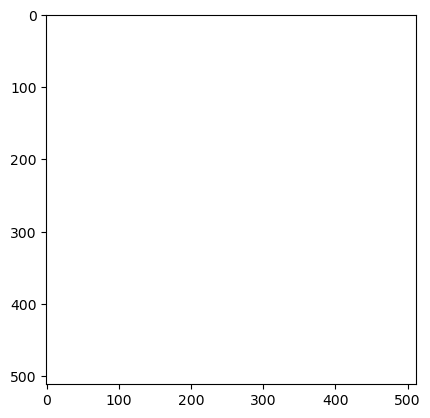

In [17]:
plt.imshow(exp_image, cmap='Greys')

In [18]:
exp_image[parsing!=0] = 1.0

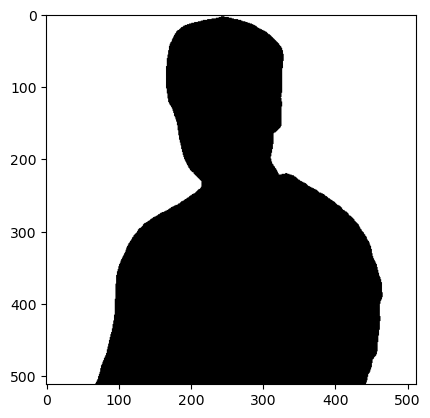

In [19]:
plt.imshow(exp_image, cmap="Greys")

In [20]:
exp_image[parsing == 16] = 0.0

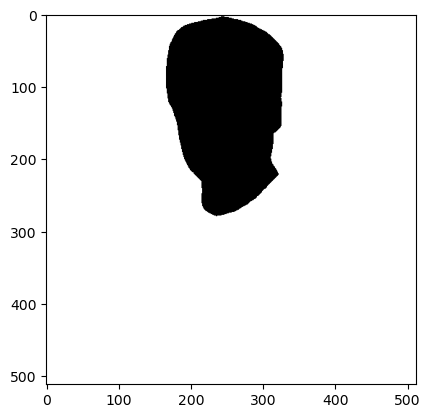

In [32]:
plt.imshow(exp_image, cmap="Greys")

In [27]:
exp_image = np.expand_dims(exp_image, 0)

In [28]:
exp_image.shape

(1, 512, 512)

In [30]:
exp_image = exp_image.reshape((512,512,1))

In [31]:
exp_image_rgb = cv2.cvtColor(exp_image,cv2.COLOR_GRAY2RGB)

error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<1>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


In [34]:
exp_image

array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]])

In [35]:
cv2.imwrite( 'test.jpg',exp_image*255)

True

In [27]:
parsing[3]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [17]:
parsing.shape

(512, 512)

In [19]:
np.unique(parsing)

array([ 0,  1,  3,  5,  7,  8, 10, 14, 16, 17])

In [20]:
new_p = parsing[parsing != 16]

In [22]:
new_p.shape

(172633,)

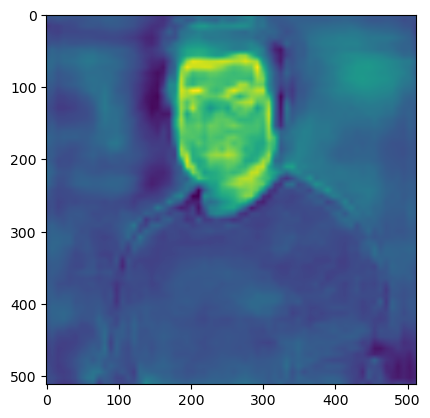

In [13]:
plt.imshow(out.squeeze(0)[1].cpu().numpy())

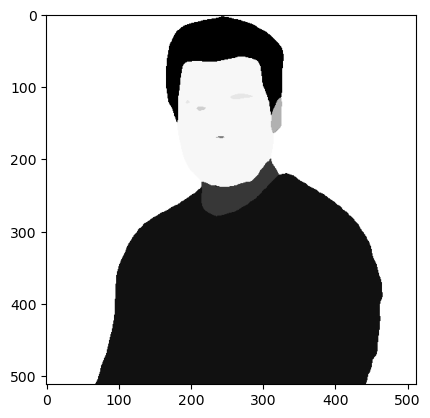

In [16]:
plt.imshow(parsing, cmap='Greys')

TypeError: Invalid shape (172633,) for image data

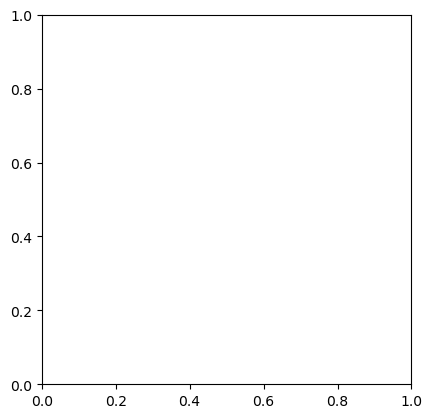

In [21]:
plt.imshow(new_p, cmap="Greys")